# DTI prototype model 2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array , load_img

from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [3]:
#Exploratory Data Analysis
len(os.listdir('/content/drive/MyDrive/87k_images_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))


38

In [4]:
train_datagen = ImageDataGenerator(zoom_range = 0.5 , shear_range = 0.3 , horizontal_flip = True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [5]:
train = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/87k_images_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train', target_size = (256,256), batch_size = 32)


val = val_datagen.flow_from_directory(directory = '/content/drive/MyDrive/87k_images_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid', target_size = (256,256), batch_size = 32)

Found 70394 images belonging to 38 classes.
Found 17579 images belonging to 38 classes.


In [6]:
t_img , label = train.next()

In [7]:
#Pre-Processing
def plotImage(img_arr , label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)     #Normalizing the image size
    plt.show()


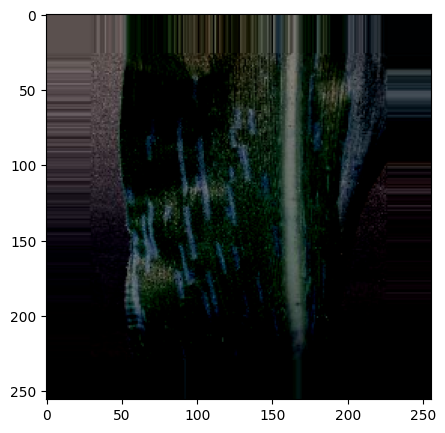

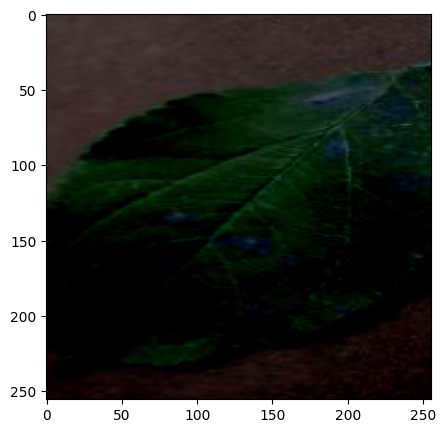

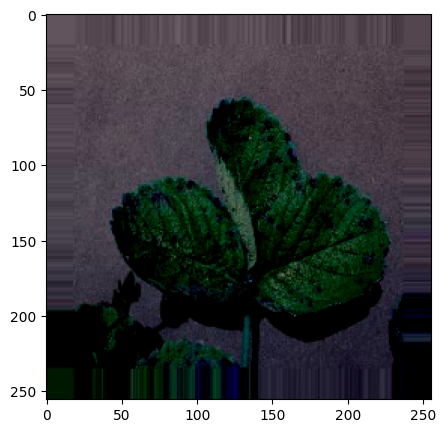

In [8]:
plotImage(t_img[:3] , label[:3])

#Model Building


In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [11]:
for layer in base_model.layers:
  layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
 X = Flatten()(base_model.output)
 X = Dense(units = 38 , activation = 'softmax')(X)

 #Creation of model
 model = Model(base_model.input, X)

 model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
model.compile(optimizer = 'adam', loss=keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [15]:
#Early stopping, Model checkpoints for large epochs
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01, patience= 3, verbose = 1)


#model checkpoint
mc = ModelCheckpoint(filepath = 'best_model.h5',
                     monitor = 'val_accuracy',
                     min_delta= 0.01,
                     patience= 3,
                     verbose = 1,
                     save_best_only = True)

cb = [es , mc]



In [16]:
his = model.fit_generator(train,
                          steps_per_epoch = 16,
                          epochs = 20,
                          verbose = 1,
                          callbacks = cb,
                          validation_data = val,
                          validation_steps = 16)

<ipython-input-16-4ab46f8db62e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.5467 - accuracy: 0.1602 
Epoch 1: val_accuracy improved from -inf to 0.39258, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 999s 64s/step - loss: 27.5467 - accuracy: 0.1602 - val_loss: 12.4504 - val_accuracy: 0.3926
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.6384 - accuracy: 0.4453 
Epoch 2: val_accuracy improved from 0.39258 to 0.59570, saving model to best_model.h5
16/16 [==============================] - 981s 63s/step - loss: 13.6384 - accuracy: 0.4453 - val_loss: 8.2307 - val_accuracy: 0.5957
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.9618 - accuracy: 0.5469 
Epoch 3: val_accuracy improved from 0.59570 to 0.70898, saving model to best_model.h5
16/16 [==============================] - 946s 60s/step - loss: 11.9618 - accuracy: 0.5469 - val_loss: 6.0977 - val_accuracy: 0.7090
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 10.5703 - accuracy: 0.5703 
Epoch 4: val_accuracy did not improve from 0.70898
16/16 [==============================] - 975s 62s/step - loss: 10.5703 - accuracy: 0.5703 - 

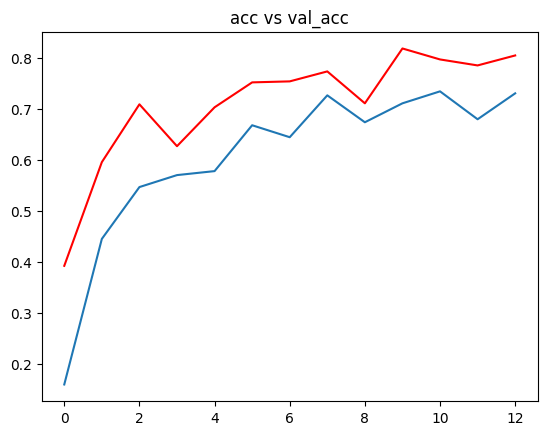

In [18]:
#Plotting the accuracy and loss curves:
h = his.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = 'red')
plt.title('acc vs val_acc')
plt.show()


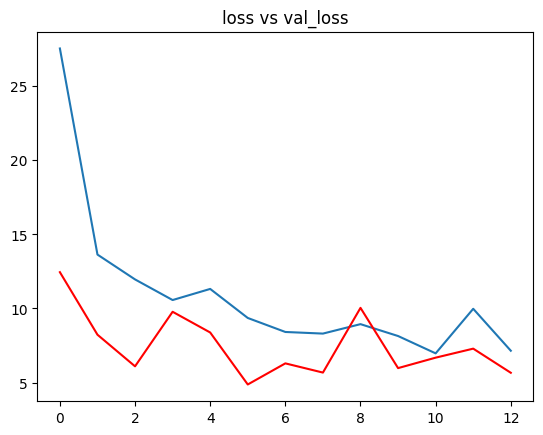

In [19]:
#Plot for loss
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs val_loss")
plt.show()

In [20]:
#Loading the best model:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [42]:
def prediction(path):
  img = load_img(path , target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)

  img = np.expand_dims(im , axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to { ref[pred ]}")



In [50]:
path = "/content/drive/MyDrive/87k_images_dataset/test/test/AppleScab2.JPG"
prediction(path)

1/1 [==============================] - 1s 1s/step
The image belongs to Apple___Apple_scab


In [41]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))


In [ ]:
#Generating the accuracy :
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of the model is: {acc*100} %")